In [1]:
import numpy as np
import pandas as pd
from tools.get_data.get_data_h5 import *
from pandasgui import show
import talib as ta
import datetime
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import roll_time_series
import numpy as np
import pandas as pd
import os
import plotly.express as px
from IPython.display import display



### 1. 获取factor数据

In [2]:
from importlib import reload
import factors as dl
reload(dl)
run = 0
if run == 1:
    data = get_data(symbol="rb99", freq="minbar", type="future",
                    source_dir="Y:/DataBase_RQ_files/")
    data["sma_diff_5"] = dl.sma_diff(data, 5)
    data["sma_diff_20000"] = dl.sma_diff(data, 20000)
    data["ema_diff_300"] = dl.ema_diff(data, 300)
    data["ema_diff_1000"] = dl.ema_diff(data, 1000)
    data["sma_of_sma_5_10"] = dl.sma_of_sma(data, 5, 10)
    data["ema_of_ema_10_30"] = dl.ema_of_ema(data, 10, 30)
    data["sma_diff_sma_5_100"] = dl.sma_diff_sma(data, 5, 100)
    data["high_60"] = dl.high(data, 60)
    data["low_60"] = dl.low(data, 60)
    data["high_60"] = dl.high(data, 60)
    data["low_60"] = dl.low(data, 60)
    data["wl_60"] = dl.wl(data, 60)
    data["wl_60"] = dl.wl(data, 60)
    data["macd_dif"], data["macd_dea"], data["macd_hist"], data["macd_signal"] = dl.MACD(
        data, fast=10, slow=60, mid=15)
    data["slope"] = dl.slope(data, 60)
    data["rsi_60"] = dl.rsi(data, 60)
    data["sar"] = dl.sar(data)
    data["rwr_60"] = dl.rwr(data, 60)
    data["rsi_100"] = dl.rsi(data, 100)
    data["rwr_100"] = dl.rwr(data, 100)
    data["aroon_up"], data["aroon_down"], data["aroon"] = dl.aroon(data, 60)
    data["tendstrength"] = dl.tendstrength(data, 120)
    data["boll"] = dl.boll(data, 200)
    data["don"] = dl.don(data, 100)
    data["sf01"] = dl.sf01(data, 60)
    data["cor_vol"] = dl.cor_vol(data, 200)
    data["cor_oi"] = dl.cor_oi(data, 1000)

    l = [1, 3, 5] + (list(range(10, 201, 5)))
    for i in l:
        data["shift_{}_rtn".format(i)] = dl.rtn_shift(data.close, -i)
    print("liqka前工作完成", len(data))

    data["long_liqka"] = dl.long_liqka(data)
    data["short_liqka"] = dl.short_liqka(data)
    data.dropna(inplace=True)
    data.to_parquet(".//data//factors.parquet")
    

# data = pd.read_parquet(".//data//factors.parquet")


In [3]:
from importlib import reload
import FactorAnalyzer as fa
reload(fa)

<module 'FactorAnalyzer' from 'e:\\Work\\5 Research\\factor_analysis\\FactorAnalyzer.py'>

In [4]:
factors =pd.read_parquet(".//data//factors.parquet")
fac = factors[["datetime","open","high","close"]][:10000]

fa_test = fa.FactorRanker(fac, 10, 2000)
rank_factors = fa_test.rank_factors("rb99")
rtn_df = fa_test.cal_returns(rank_factors.close)
rank_fa =fa.RankFactorAnalyzer(rank_factors, rtn_df)
results_df = rank_fa.cal_rank_results()
factors_select = rank_fa.factors_select(results_df)


In [5]:
factors_select

mean_rtn   win_rate  count  effective_period
factor     rank return                                                     
close_rank 9.0  shift_200_rtn  0.420457  67.313019    722              48.0
                shift_195_rtn  0.412907  67.451524    722              48.0
open_rank  9.0  shift_200_rtn  0.412516  67.128988    721              48.0
                shift_195_rtn  0.405547  67.267684    721              48.0
high_rank  9.0  shift_200_rtn  0.405539  66.758621    725              49.0
...                                 ...        ...    ...               ...
close_rank 1.0  shift_195_rtn -0.353898  62.688822    662               NaN
open_rank  1.0  shift_185_rtn -0.364550  60.708783    649               NaN
                shift_190_rtn -0.373482  61.479199    649               NaN
                shift_200_rtn -0.377126  61.016949    649               NaN
                shift_195_rtn -0.379053  61.325116    649               NaN

[1344 rows x 4 columns]

画出前3个因子的图
datetime
2010-06-21 14:49:00   -0.434646
2010-06-21 14:50:00   -0.483539
2010-06-21 14:51:00   -0.529794
2010-06-21 14:52:00   -0.522682
2010-06-21 14:53:00   -0.507599
                         ...   
2010-07-21 14:56:00   -0.108510
2010-07-21 14:57:00   -0.070268
2010-07-21 14:58:00   -0.051529
2010-07-21 14:59:00   -0.032545
2010-07-21 15:00:00    0.015696
Name: shift_200_rtn, Length: 722, dtype: float64


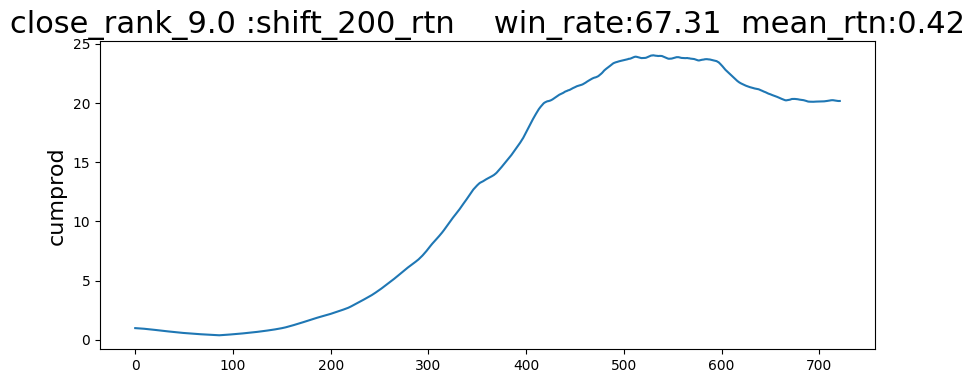

datetime
2010-06-21 14:49:00   -0.436771
2010-06-21 14:50:00   -0.459662
2010-06-21 14:51:00   -0.506273
2010-06-21 14:52:00   -0.473930
2010-06-21 14:53:00   -0.525981
                         ...   
2010-07-21 14:56:00    0.012425
2010-07-21 14:57:00   -0.031412
2010-07-21 14:58:00   -0.022301
2010-07-21 14:59:00   -0.058750
2010-07-21 15:00:00   -0.019583
Name: shift_195_rtn, Length: 722, dtype: float64


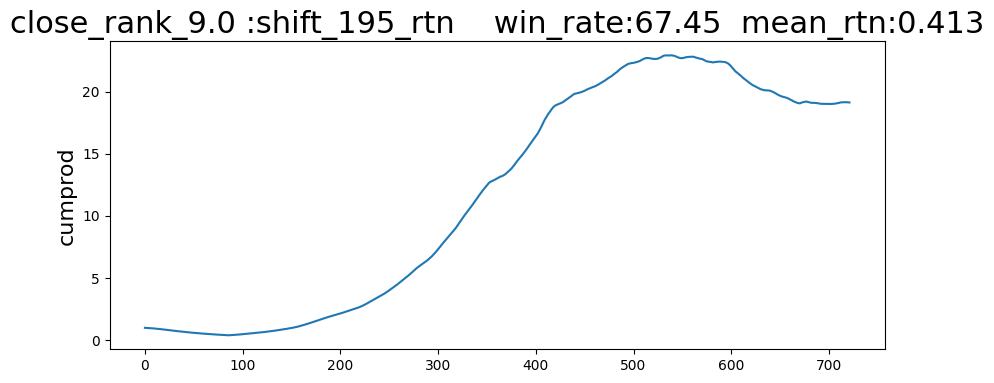

datetime
2010-06-21 14:45:00   -0.404521
2010-06-21 14:50:00   -0.483539
2010-06-21 14:51:00   -0.529794
2010-06-21 14:52:00   -0.522682
2010-06-21 14:53:00   -0.507599
                         ...   
2010-07-21 14:57:00   -0.070268
2010-07-21 14:58:00   -0.051529
2010-07-21 14:59:00   -0.032545
2010-07-21 15:00:00    0.015696
2010-07-22 09:01:00    0.101568
Name: shift_200_rtn, Length: 721, dtype: float64


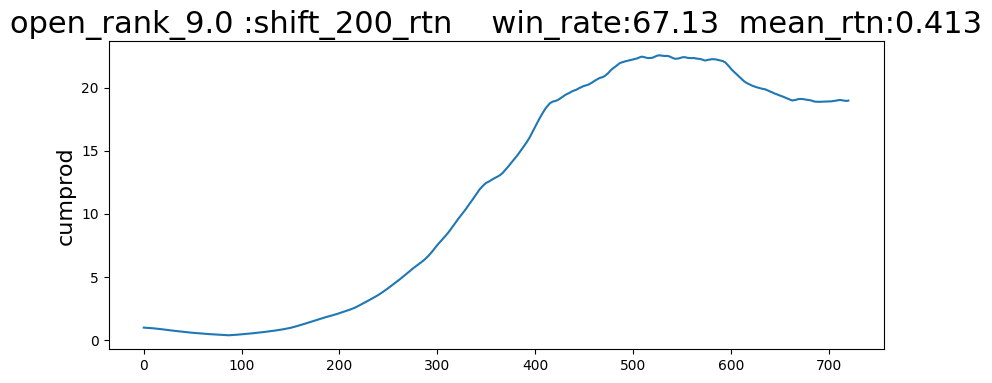

In [6]:
rank_fa.plots(results_df)

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


class FactorAnalyzer:
    # ... 其他代码与之前相同
    def __init__(self, rank_factors, returns):
        self.rank_factors = rank_factors
        self.returns = returns
        self.data = pd.concat([rank_factors, returns], axis=1)


    def analyze_factor_effectiveness(self,ic_value:int = 0.1):
        factor_effectiveness = {}

        factor_cols=[col for col in self.data.columns if 'rtn' not in col]
        rtn_cols = [col for col in self.data.columns if 'rtn' in col]
        for factor in factor_cols:
            for rtn in rtn_cols:
                X = self.data[factor]
                X = sm.add_constant(X)
                y = self.data[rtn]
                model = sm.OLS(y, X).fit()
                factor_effectiveness[factor] = {
                    'regression_coeff': model.params[factor],
                    't_stat': model.tvalues[factor],
                    'p_value': model.pvalues[factor]
                }

        # 计算信息系数（IC）
        for factor in factor_cols:
            for rtn in rtn_cols:
                factor_values = self.data[factor]
                future_returns = self.data[rtn]
                ic = factor_values.corr(future_returns)
                factor_effectiveness[factor]['ic_{}'.format(rtn)] = ic

        self.results = pd.DataFrame(factor_effectiveness).T

        cond = (self.results >ic_value) + (self.results < -ic_value)
        ic_bigger = [(index, column, r.loc[index, column]) 
                    for column in cond.columns
                    for index in cond.index if cond.loc[index, column]]
        return self.results,ic_bigger
fa_results = FactorAnalyzer(rank_factors, rtn_df)
result,ic_bigger = fa_results.analyze_factor_effectiveness()


NameError: name 'r' is not defined

In [ ]:
result

In [ ]:
ic_bigger

In [ ]:
cond = (r>0.07) + (r<-0.1)
result = [(index, column, r.loc[index, column]) for column in cond.columns
          for index in cond.index if cond.loc[index, column]]

print(result)


In [ ]:
import pandas as pd

# 假设这是你的DataFrame
data = {'A': [1, 4, 2, 8], 'B': [5, 2, 3, 6], 'C': [3, 1, 7, 4]}

df = pd.DataFrame(data)

# 使用布尔索引找到所有大于3的数据的位置
greater_than_3 = df > 3

# 获取大于3的数据的列名、索引和值
result = [(index, column, df.loc[index, column])
          for column in greater_than_3.columns
          for index in greater_than_3.index
          if greater_than_3.loc[index, column]]

print(result)


In [ ]:
df =pd.DataFrame()
df["a"] ={"model":1,"t":3123}
df

In [ ]:
factors_select

In [ ]:
rank_fa.cumsum_plot(results_df)

In [ ]:
rank_df2 = pd.concat([rank_df, rtn_df], axis=1).dropna()
rank_df2.close_rank.max()+1

In [ ]:
rtn_df

In [ ]:
rtn_df = fa_test.cal_returns(rank_df.close)
(rtn_df[["price", "shift_1_rtn"]]-2/10000 )*100


In [ ]:
factors_1[["close","shift_1_rtn"]][2000:10000]

In [ ]:
rank_df
rank_df2 = pd.read_parquet(".//data//symbol_2000_10_rank_df.parquet")
show(rank_df2[["open", "high", "high_rank", "open_rank"]][:8000], rank_df)


### 2. 因子分析

#### 2.1 创建因子rank_df/results_df(耗时长)

In [ ]:
rank_df.equals(rank_df2[["open", "high", "high_rank", "open_rank"]][:8000])


In [ ]:
# 创建series
factors_1 = factors.set_index("datetime",  drop=True)
s = factors_1["open"]
type(s.index)

In [ ]:
if pd.core.indexes.datetimes.DatetimeIndex is pd.core.indexes.datetimes.DatetimeIndex:
    print(2)

In [ ]:
my_list = list(range(1, 31)) + list(range(30, 201, 5))
print(my_list)
list(range(31)) + list(range(30, 201, 5))


In [ ]:
rank_df2[["open", "high", "high_rank", "open_rank"]][:8000]

In [ ]:
from importlib import reload    
import factor_analysis as fa
reload(fa)
data = pd.read_parquet(".//data//factors.parquet")
data.set_index("datetime", inplace=True, drop=True)
factors_cols = []
rtn_cols = []
for col in data.columns:
    if col not in ['datetime', 'trading_date', "symbol"]:
        if "rtn" not in col and "liqka" not in col:
            factors_cols.append(col)
        else:
            rtn_cols.append(col)
factors = data[factors_cols]
rtn = data[rtn_cols]
run = 0
if run == 1:
    fal = fa.FactorAnalysis_ori()
    rank_df, results_df = fal.cal_rank_results(
    factors, rtn, save=True, sample_size=60000, bins=20)

    rank_df, results_df = fal.cal_rank_results(
        factors, rtn, save=True, sample_size=30000, bins=20)
    rank_df, results_df = fal.cal_rank_results(
        factors, rtn, save=True, sample_size=20000, bins=15)
    rank_df, results_df = fal.cal_rank_results(
        factors, rtn, save=True, sample_size=10000, bins=15)
    rank_df, results_df = fal.cal_rank_results(
        factors, rtn, save=True, sample_size=5000, bins=10)
    rank_df, results_df = fal.cal_rank_results(
        factors, rtn, save=True, sample_size=2000, bins=10)
    rank_df, results_df = fal.cal_rank_results(
        factors, rtn, save=True, sample_size=1000, bins=10)
    rank_df, results_df = fal.cal_rank_results(factors, rtn,save=True,sample_size=500,bins=10)

In [ ]:
type(factors.index) == pd.core.indexes.datetimes.DatetimeIndex

In [ ]:
# 直接读取rank_df/results_df
# print(os.listdir(".//data//"))
rank_df = pd.read_parquet(".//data//symbol_2000_10_rank_df.parquet")
results_df = pd.read_parquet(   ".//data//symbol_2000_10_results_df.parquet")
# rank_df = pd.read_parquet(".//data//symbol_30000_20_rank_df.parquet")
# results_df = pd.read_parquet(".//data//symbol_30000_20_results_df.parquet")


In [ ]:
show(rank_df.head(500),results_df.head(500))

#### 2.2 因子分析

In [ ]:
import factor_analysis as fa
from importlib import reload
reload(fa)
fal = fa.FactorAnalysis_ori()


In [ ]:
rank_df_show = rank_df.head(500)
results_df_show = results_df.head(500)
select_df = fal.factors_select(rank_df, results_df)
show(rank_df_show, results_df_show, select_df)


In [ ]:
for i in range(len(rank_df))

In [ ]:
import pandas as pd

data = {'Name': ['John', 'Anna', 'Peter', 'Linda', 'Harry'],
        'Age': [18, 19, 20, 19, 18],
        'Gender': ['M', 'F', 'M', 'F', 'M'],
        'Math Score': [85, 78, 92, 90, 87],
        'English Score': [80, 85, 88, 91, 82]}

df = pd.DataFrame(data)

selected_rows = df.query('Age==18 and `English Score`>5')
selected_rows


In [ ]:
import factor_analysis as fa
from importlib import reload
reload(fa)
fal = fa.FactorAnalysis_ori()
rank_df_e = pd.read_parquet(".//data//symbol_30000_20_rank_df.parquet")[:60000]
results_df_e = fal.cal_rank_results(factors,rtn,rank_df=rank_df_e)
results_df_e


In [ ]:
a =np.array([1,2,3,4,5,6,7,8,9,10])
# a新增一个元素11
a = np.append(a, 11)
b =np.array([1]*len(a)) -a
b

In [ ]:
on_bar函数会在每一个新的bar到来的时候被调用, 我需要记录每次在long_signal = True 或short_signal = True的时候, 分别记录下bar.close及direction的信息作为入场价格, 另外在触发close_pos > 0或者close < 0 时候的bar.close信息及direction作出出场价格, 然后根据记录的信息计算最近20次交易中的平均收益


In [ ]:
#因子分析, 画出最佳因子的累计收益图
from importlib import reload
import factor_analysis as fa
reload(fa)
fal = fa.FactorAnalysis_ori()
# seletced ={} #选择的因子
# show_up = 6
# for  i in os.listdir(".//data//"):
#     if "30000_20_results" in i:
#         _rank = i.replace("_results_df", "_rank_df")
#         _rank_df = pd.read_parquet(".//data//"+_rank)
#         sample_size,bins = i[7:-19].split("_")
#         sample_size =int(sample_size)
        # bins = int(bins)
        #重新计算因子的平均收益,胜率,有效期等信息
        # _results_df = fal.cal_rank_results(factors, rtn, rank_df = _rank_df, sample_size=sample_size, bins=bins, save=True)
        # _results_df.drop(['long_liqka_mean', 'short_liqka_mean','long_liqka_win_rate', 'short_liqka_win_rate'],axis=1,inplace=True)
        
        # # _results_df = pd.read_parquet(".//data//"+i)
        # seletced[i[7:-19]] = fal.factors_select(
        #     _results_df, win_rate=0, rtn=-3, count=None, sorted="mean_rtn")
        # display(f"seletced: { i[7:-19]}" , seletced[i[7:-19]].head())
        # fal.cumsum_plot(rank_df = _rank_df, 
        #                 results_df = _results_df,
        #                 n =3,
        #                 sorted="mean_rtn")
        
        # show_up -= 1
        # if show_up == 0:
            # break

### 3. 因子有效期分析


In [ ]:
rank_df = pd.read_parquet(".//data//symbol_30000_20_rank_df.parquet")
rank_df

In [ ]:
seletced["10000_15"]

In [ ]:

"short_liqka_mean"[:-5]


In [ ]:
_results_df

In [ ]:
rank_df[['sar_rank', 'rsi_60_rank', 'rwr_60_rank', 'rsi_100_rank','shift_155_rtn', 'shift_160_rtn', 'shift_165_rtn', 'shift_170_rtn']].head()